In [ ]:
import torch
from diffusers import DPMSolverMultistepScheduler
from text3d2video.pipelines.sd_pipeline import SDPipeline

sd_repo = "runwayml/stable-diffusion-v1-5"

dtype = torch.float16

pipe = SDPipeline.from_pretrained(sd_repo, dtype=dtype).to("cuda")

pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)

Keyword arguments {'dtype': torch.float16} are not expected by SDPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

In [54]:
prompt = "Deadpool"

guidance_scales = [0, 1, 2, 4, 6, 10, 15, 20, 30]
n=3

all_ims = []

for guidance_scale in guidance_scales:
    gen = torch.Generator(device="cuda")
    gen.manual_seed(0)
    images = pipe([prompt] * n, num_inference_steps=20, guidance_scale=guidance_scale, generator=gen)
    all_ims.append(images)

100%|██████████| 20/20 [00:05<00:00,  3.82it/s]


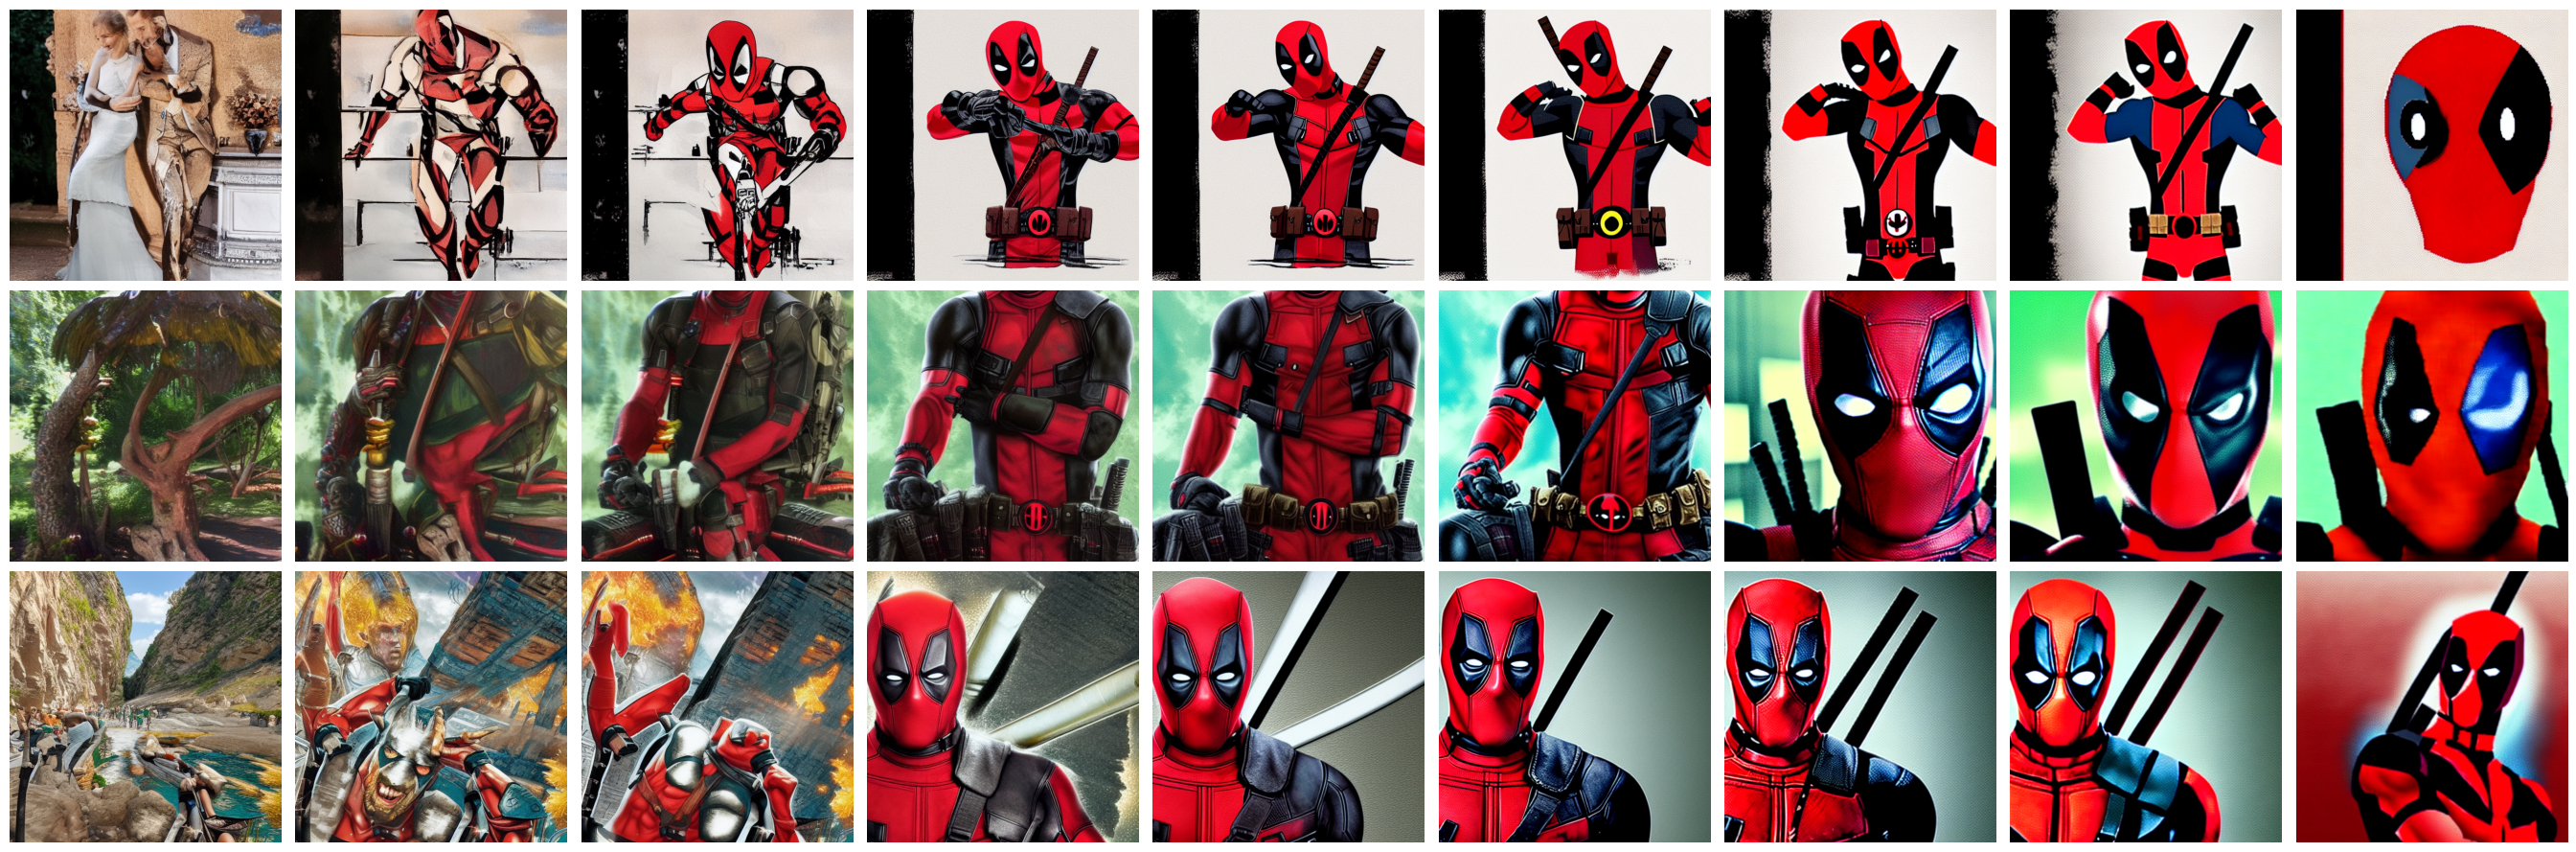

In [55]:
import matplotlib.pyplot as plt

scale = 3
n_cols = len(all_ims)
n_rows = len(all_ims[0])
fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols * scale, n_rows * scale))

for i, ims in enumerate(all_ims):
    for j, im in enumerate(ims):
        axs[j, i].imshow(im)
        axs[j, i].axis("off")

plt.tight_layout()